In [1]:
import pandas as pd
from imputena import seasonal_interpolation
import matplotlib.pyplot as plt

# Read and clean data

In [2]:
raw_df = pd.read_csv("data/data.csv", index_col=0)

In [3]:
raw_df

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
0,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.920000,1.490000,0.0,16.0,23.55
1,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.920000,1.490000,0.0,16.0,23.55
2,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.050000,3.490000,0.0,3.0,10.47
3,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.050000,3.490000,0.0,3.0,10.47
4,2022-02-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.640000,0.990000,0.0,13.0,12.84
...,...,...,...,...,...,...,...,...
1873,2021-04-03,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,40.0,17.0,25.33
1874,2021-04-03,80101923,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,2.0,5.98
1875,2021-04-03,80101923,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,2.0,5.98
1876,2021-04-03,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,23.0,22.77


### Drop duplicates

In [4]:
raw_df = raw_df.drop_duplicates()

In [5]:
raw_df.groupby(['item_name'])['day'].count()

item_name
ROMA TOMATEN ES I 500G SF         313
SL MANDARINEN BEH.ES I 750G GS    313
UH ZWIEBELN DE-HE I 1KG GS        313
Name: day, dtype: int64

In [6]:
raw_df.groupby(['item_name'])['day'].nunique()

item_name
ROMA TOMATEN ES I 500G SF         313
SL MANDARINEN BEH.ES I 750G GS    313
UH ZWIEBELN DE-HE I 1KG GS        313
Name: day, dtype: int64

### Convert day into date object

In [7]:
raw_df['day'] = pd.to_datetime(raw_df['day'])

/var/folders/hj/_n28zpjd77v589mypbm9z1vr0000gn/T/ipykernel_85200/2817674628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['day'] = pd.to_datetime(raw_df['day'])


In [8]:
raw_df.sort_values(['item_name', 'day'])

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
1872,2021-04-03,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,40.0,17.0,25.33
1866,2021-04-04,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,0.0,0.0,NaN
1860,2021-04-05,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,0.0,0.0,NaN
1854,2021-04-06,80317483,ROMA TOMATEN ES I 500G SF,0.990000,1.490000,0.0,18.0,26.82
1848,2021-04-07,80317483,ROMA TOMATEN ES I 500G SF,0.990000,1.490000,10.0,5.0,7.45
...,...,...,...,...,...,...,...,...
28,2022-02-05,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.600000,0.790000,54.0,27.0,21.27
22,2022-02-06,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,0.0,NaN
16,2022-02-07,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.640000,0.990000,0.0,10.0,9.77
10,2022-02-08,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.640000,0.990000,18.0,18.0,17.66


## Check for missing data

### Join existing data to the grid of dates

In [9]:
df1 = pd.DataFrame()
for item_number in raw_df.item_number.unique():
    _df = raw_df.loc[raw_df.item_number == item_number]
    dates_grid = pd.DataFrame(pd.date_range(start=_df.day.min(), end=_df.day.max()), columns=['day'])
    df1 = df1.append(pd.merge(dates_grid, _df, how='left', on='day'))

/var/folders/hj/_n28zpjd77v589mypbm9z1vr0000gn/T/ipykernel_85200/2838252224.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.merge(dates_grid, _df, how='left', on='day'))
/var/folders/hj/_n28zpjd77v589mypbm9z1vr0000gn/T/ipykernel_85200/2838252224.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.merge(dates_grid, _df, how='left', on='day'))
/var/folders/hj/_n28zpjd77v589mypbm9z1vr0000gn/T/ipykernel_85200/2838252224.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.merge(dates_grid, _df, how='left', on='day'))


In [10]:
df1

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
0,2021-04-03,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,40.0,17.0,25.33
1,2021-04-04,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,0.0,0.0,NaN
2,2021-04-05,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,0.0,0.0,NaN
3,2021-04-06,80317483,ROMA TOMATEN ES I 500G SF,0.990000,1.490000,0.0,18.0,26.82
4,2021-04-07,80317483,ROMA TOMATEN ES I 500G SF,0.990000,1.490000,10.0,5.0,7.45
...,...,...,...,...,...,...,...,...
308,2022-02-05,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.600000,0.790000,54.0,27.0,21.27
309,2022-02-06,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,0.0,NaN
310,2022-02-07,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.640000,0.990000,0.0,10.0,9.77
311,2022-02-08,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.640000,0.990000,18.0,18.0,17.66


In [11]:
df1.isnull().sum()

day                         0
item_number                 0
item_name                   0
purchase_price              0
suggested_retail_price      0
orders_quantity             0
sales_quantity              0
revenue                   476
dtype: int64

My suggestion is that we have to predict sales quantity, beacuse the revenue is derivative of the sales_quantity. That's why we can use revenue as a predictor for the model

In [12]:
df1.drop(['revenue'], axis=1, inplace=True)

In [13]:
df1.head()

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity
0,2021-04-03,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,40.0,17.0
1,2021-04-04,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,0.0,0.0
2,2021-04-05,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,0.0,0.0
3,2021-04-06,80317483,ROMA TOMATEN ES I 500G SF,0.990000,1.490000,0.0,18.0
4,2021-04-07,80317483,ROMA TOMATEN ES I 500G SF,0.990000,1.490000,10.0,5.0


## Product 80317483 (product_1)

In [14]:
id_1 = 80317483
product_1 = df1.loc[df1.item_number == id_1]
product_1.head()

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity
0,2021-04-03,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,40.0,17.0
1,2021-04-04,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,0.0,0.0
2,2021-04-05,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,0.0,0.0
3,2021-04-06,80317483,ROMA TOMATEN ES I 500G SF,0.990000,1.490000,0.0,18.0
4,2021-04-07,80317483,ROMA TOMATEN ES I 500G SF,0.990000,1.490000,10.0,5.0


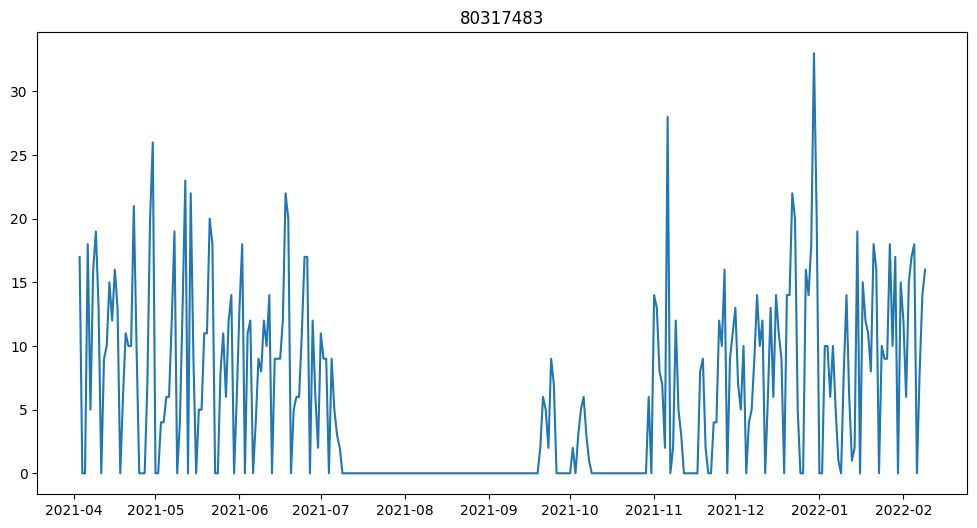

In [15]:
plt.figure(figsize=(12,6))
plt.plot(product_1['day'], product_1['sales_quantity'])
plt.title(f"{id_1}")
plt.show()

In [16]:
product_1.to_csv(f'data/prepared_data/product_{id_1}.csv')

## Product 80101923 (product_2)

In [17]:
id_2 = 80101923
product_2 = df1.loc[df1.item_number == id_2]
product_2.head()

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity
0,2021-04-03,80101923,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,2.0
1,2021-04-04,80101923,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,0.0
2,2021-04-05,80101923,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,0.0
3,2021-04-06,80101923,SL MANDARINEN BEH.ES I 750G GS,1.920000,2.990000,0.0,1.0
4,2021-04-07,80101923,SL MANDARINEN BEH.ES I 750G GS,1.920000,2.990000,0.0,0.0


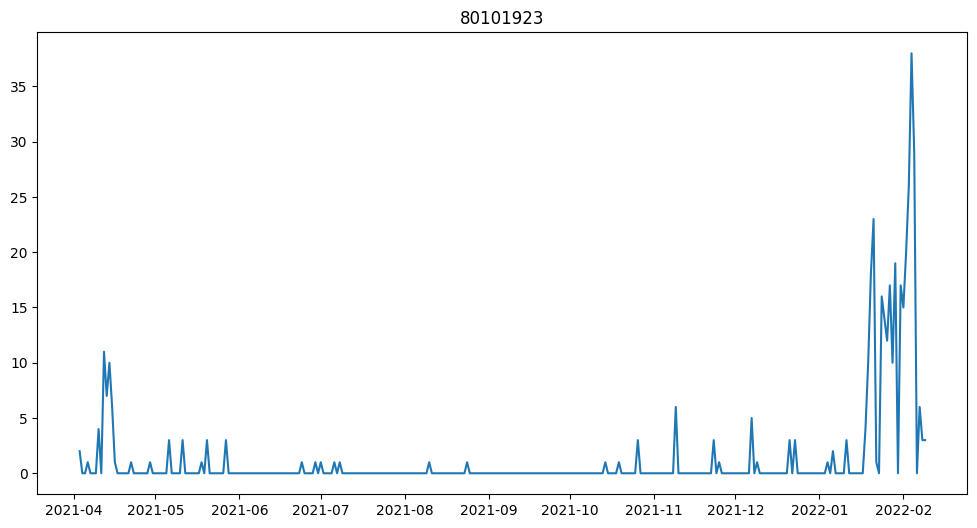

In [18]:
plt.figure(figsize=(12,6))
plt.plot(product_2['day'], product_2['sales_quantity'])
plt.title(f"{id_2}")
plt.show()

Because we have got huge gap in sales we can rely on this part of data (it might lead us to bad results). We will use only second part of data

In [19]:
product_2 = product_2.loc[product_2.day >= "2022-01-18"]

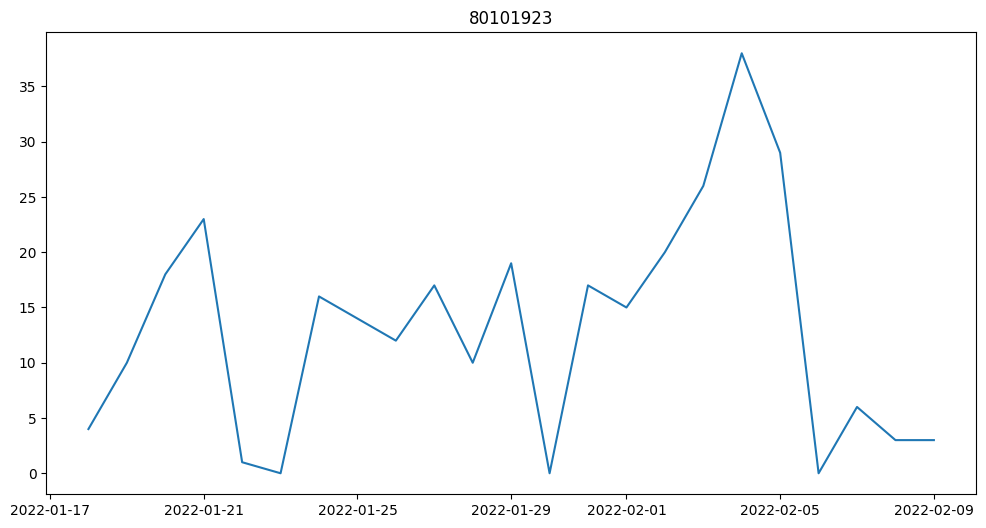

In [20]:
plt.figure(figsize=(12,6))
plt.plot(product_2['day'], product_2['sales_quantity'])
plt.title(f"{id_2}")
plt.show()

In [21]:
product_2.head()

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity
290,2022-01-18,80101923,SL MANDARINEN BEH.ES I 750G GS,2.15,3.49,0.0,4.0
291,2022-01-19,80101923,SL MANDARINEN BEH.ES I 750G GS,2.15,3.49,14.0,10.0
292,2022-01-20,80101923,SL MANDARINEN BEH.ES I 750G GS,2.15,3.49,14.0,18.0
293,2022-01-21,80101923,SL MANDARINEN BEH.ES I 750G GS,2.15,3.49,0.0,23.0
294,2022-01-22,80101923,SL MANDARINEN BEH.ES I 750G GS,2.15,3.49,0.0,1.0


In [22]:
product_2.to_csv(f'data/prepared_data/product_{id_2}.csv')

## Product 80028349 (product_3)

In [23]:
id_3 = 80028349
product_3 = df1.loc[df1.item_number == id_3]
product_3.head()

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity
0,2021-04-03,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,23.0
1,2021-04-04,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,0.0
2,2021-04-05,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,0.0
3,2021-04-06,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.610000,0.790000,0.0,26.0
4,2021-04-07,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.610000,0.790000,0.0,19.0


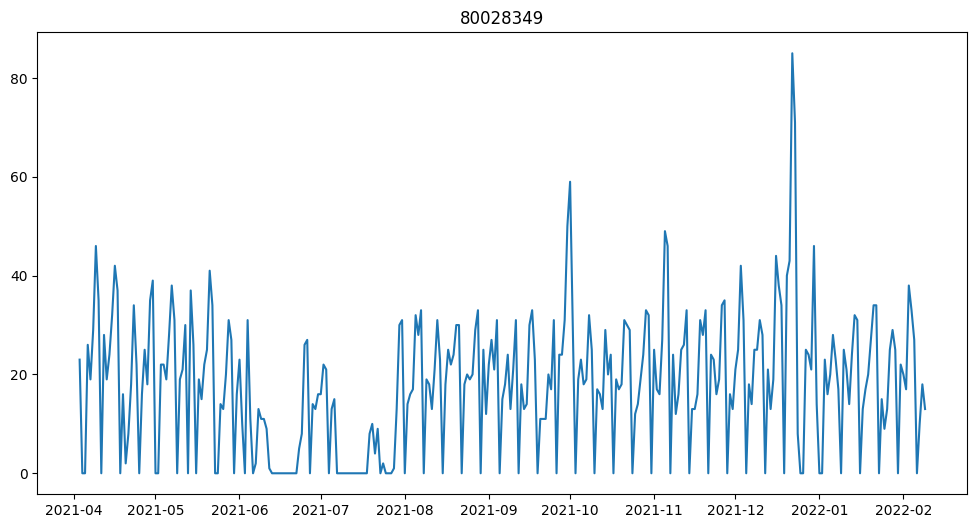

In [24]:
plt.figure(figsize=(12,6))
plt.plot(product_3['day'], product_3['sales_quantity'])
plt.title(f"{id_3}")
plt.show()

In [25]:
product_3.head()

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity
0,2021-04-03,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,23.0
1,2021-04-04,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,0.0
2,2021-04-05,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,0.0
3,2021-04-06,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.610000,0.790000,0.0,26.0
4,2021-04-07,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.610000,0.790000,0.0,19.0


In [26]:
product_3.to_csv(f'data/prepared_data/product_{id_3}.csv')